# Second Order Circuit

<img src="SecondOrder_circuit.png" width ="400" height=400>


### Goal 
Compute the volatge $v(t)$

## LTspice netlist and Python
**(file "SecondOrder.cir")**

```
* Second Order - SPICE

* lossless
Vil 1l 0 1
R1l 1l 2l 0.001m
L1l 2l 3l 1 IC=0
C1l 3l 0 1 IC=0

* underdamped
Viu 1u 0 1
R1u 1u 2u 0.5
L1u 2u 3u 1 IC=0
C1u 3u 0 1 IC=0

* overdumped
Vio 1o 0 1
R1o 1o 2o 5
L1o 2o 3o 1 IC=0
C1o 3o 0 1 IC=0

* critical
Vic 1c 0 1
R1c 1c 2c 2
L1c 2c 3c 1 IC=0
C1c 3c 0 1 IC=0

* Circuit analysis
.TRAN 20 UIC

*saving the data
.PRINT V(3l) V(3u) V(3o) V(3c)
.END


```


## Theory

$$\frac{d^2}{dt^2}v_c+\frac{R}{L}\frac{d}{dt}v_c+\frac{1}{LC}v_c=\frac{1}{LC}V_S$$

- Characteristic polynomial:

$$\lambda^2+\frac{R}{L}\lambda+\frac{1}{LC}<0$$

$$\lambda_{1,2}=-\frac{R}{2L}\pm\sqrt{\frac{R^2}{4L^2}-\frac{1}{LC}}$$

- Lossless

$$R=0\,\Omega\rightarrow \lambda_{1,2}=\pm j \frac{1}{\sqrt{(LC)}}$$

- Underdumped:

$$\frac{R^2}{4L^2}-\frac{1}{LC}<0$$

- Overdumped damped: 

$$\frac{R^2}{4L^2}-\frac{1}{LC}>0$$


- Critical damped: 

$$\frac{R^2}{4L^2}-\frac{1}{LC}=0$$



In our example: $C=1$F and $L=1$H (fixed values), $R\approx0\,\Omega$ (lossless) $R=0.5\,\Omega$ (underdumped), $R=5\,\Omega$ (overdumped) and $R=2\,\Omega$ (critical value)

Text(0, 0.5, ' Imag $\\lambda$')

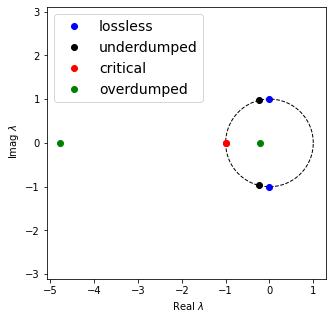

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

import mpld3
mpld3.enable_notebook()

# defining the characteristic polynomial

#lossless

R = 0
C = 1
L = 1

ppar = [1, R/L, 1/L/C]
p = np.poly1d(ppar)

r_lossless=np.roots(ppar)


#underdumped

R = 0.5
C = 1
L = 1

ppar = [1, R/L, 1/L/C]
p = np.poly1d(ppar)

r_under=np.roots(ppar)

#overdumped

R = 5
C = 1
L = 1

ppar = [1, R/L, 1/L/C]
p = np.poly1d(ppar)

r_over=np.roots(ppar)

#critical

R = 2
C = 1
L = 1

ppar = [1, R/L, 1/L/C]
p = np.poly1d(ppar)

r_cri=np.roots(ppar)

var = np.linspace(0,2*np.pi,100)
circle_x = np.cos(var)
circle_y = np.sin(var)

plt.figure(figsize=(5, 5))
plt.plot(circle_x,circle_y,'k--',lw=1)
plt.plot(np.real(r_lossless),np.imag(r_lossless),'bo',lw=3,label='lossless')
plt.plot(np.real(r_under),np.imag(r_under),'ko',lw=3,label='underdumped')
plt.plot(np.real(r_cri),np.imag(r_cri),'ro',lw=3,label='critical')
plt.plot(np.real(r_over),np.imag(r_over),'go',lw=3,label='overdumped')

plt.axis('equal')

plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.xlabel(r' Real $\lambda$')
plt.ylabel(r' Imag $\lambda$')


In [2]:
import os
import ltspice


import warnings
warnings.filterwarnings("ignore")

#Run the simulation and save in binary .raw
os.system('/Applications/LTspice.app/Contents/MacOS/LTspice -b SecondOrder.cir')


#read the raw file generated by LTspice
filepath = 'SecondOrder.raw'


l = ltspice.Ltspice(filepath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

print(l.variables)



['time', 'V(3l)', 'V(3u)', 'V(3o)', 'V(3c)']


Text(0, 0.5, 'Voltage (V)')

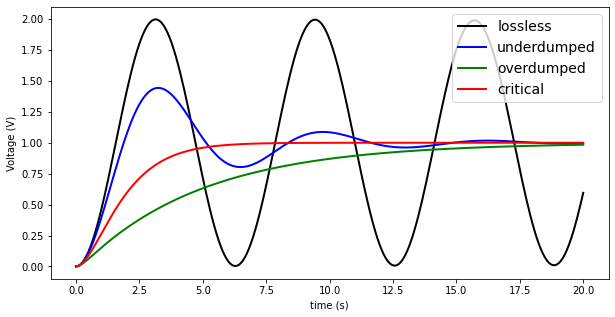

In [3]:
var = l.variables

time = l.get_time()

vl = l.getData(var[1])
vu = l.getData(var[2])
vo = l.getData(var[3])
vc = l.getData(var[4])


# interpolate the data
from scipy.interpolate import interp1d

time_interp = np.linspace(0,np.max(time),num=250)

vl_interp = interp1d(time, vl, kind='cubic')
vu_interp = interp1d(time, vu, kind='cubic')
vo_interp = interp1d(time, vo, kind='cubic')
vc_interp = interp1d(time, vc, kind='cubic')



plt.figure(figsize=(10, 5))

plt.plot(time_interp,vl_interp(time_interp),'k',lw=2,label='lossless')
plt.plot(time_interp,vu_interp(time_interp),'b',lw=2,label='underdumped')
plt.plot(time_interp,vo_interp(time_interp),'g',lw=2,label='overdumped')
plt.plot(time_interp,vc_interp(time_interp),'r',lw=2,label='critical')


plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
#plt.title('')
#plt.savefig('test_noise_level_v1.pdf')

